# Introduction


Spotify is one of the most popular apps today where people can listen to music and create their own playlists. In this practice, some songs may reach the top by listening more. This project has been prepared for the analysis of songs on Spotify. The songs were analyzed in many different areas according to years and styles.
</font>

In [ ]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive/proje"

Mounted at ./drive


## Importing Libraries
*  At the beginning of our project, we connected our drive to get the data that we need throughout the project steps.
* After connection, we import some important libraries to be able to visualize the data, calculate statistical values and at them and come up with a proper hypothesis.
* Besides, to filter possible warnings we used 'ignore'. Our aim to do that is to protect the design of our project from unnecessary writings and errors.

In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
import warnings
import re
from scipy import stats # for statistical calculations

warnings.filterwarnings('ignore')

%matplotlib inline


## Reading Data Files


* Before going further, we need to read our datas that is assigned for this project.

* In the following code cell, we opened each data files and named each dataframe according to the content of the data file.

In [ ]:
first_data_name = "data.csv"
file_artist = "data_by_artist.csv"
file_genres = "data_by_genres.csv"
file_years = "data_by_year.csv"
file_wgenres = "data_w_genres.csv"

first_data = pd.read_csv(join(path_prefix, first_data_name))
data_for_artist = pd.read_csv(join(path_prefix, file_artist))
data_for_genres = pd.read_csv(join(path_prefix, file_genres))
data_for_years = pd.read_csv(join(path_prefix, file_years))
data_for_wgenres = pd.read_csv(join(path_prefix, file_wgenres))

### Utilized Datasets

#### Numerical details of data

In [ ]:
first_data.head(3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920
2,0.993,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920



 
1.  Number of rows and columns can be found in the following code cells for each data sets
2.  Also, types of each attribute are listed below for first_data
3. Since all datas have similar attributes, there is no need to show each data's attributes' type


 </font>

In [ ]:
num_row, num_col = first_data.shape 
print("total number of rows in first_data: {} \ntotal number of columns in first_data: {}".format(num_row, num_col))
print("\nTypes of attributes:\n{}".format(first_data.dtypes))

total number of rows in first_data: 174389 
total number of columns in first_data: 19

Types of attributes:
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object


In [ ]:
first_data.isna().sum() / first_data.shape[0]

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
dtype: float64

In [ ]:
data_for_artist.head(3)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.0,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7


In [ ]:
num_row, num_col = data_for_artist.shape 
print("total number of rows in data_for_artist: {} \ntotal number of columns in data_for_artist: {}".format(num_row, num_col))

total number of rows in data_for_artist: 32539 
total number of columns in data_for_artist: 15


In [ ]:
data_for_artist.isna().sum() / data_for_artist.shape[0]

artists             0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
count               0.0
dtype: float64

In [ ]:
data_for_genres.head(2)

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.2841,352593.2,0.159580,0.484374,0.16858,-22.153400,0.062060,91.351000,0.143380,6.6,4,1
1,432hz,0.485515,0.3120,1047430.4,0.391678,0.477250,0.26594,-18.131267,0.071717,118.900933,0.236483,41.2,11,1


In [ ]:
num_row, num_col = data_for_genres.shape 
print("total number of rows in data_for_genres: {} \ntotal number of columns in data_for_genres: {}".format(num_row, num_col))

total number of rows in data_for_genres: 3232 
total number of columns in data_for_genres: 14


In [ ]:
data_for_genres.isna().sum() / data_for_genres.shape[0]

genres              0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
dtype: float64

In [ ]:
data_for_years.head(2)

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.65402,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.81166,0.078952,102.425397,0.378276,0.391026,2,1


In [ ]:
num_row, num_col = data_for_years.shape 
print("total number of rows in data_for_years: {} \ntotal number of columns in data_for_years: {}".format(num_row, num_col))

total number of rows in data_for_years: 102 
total number of columns in data_for_years: 14


In [ ]:
data_for_years.isna().sum() / data_for_years.shape[0]

year                0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
dtype: float64

In [ ]:
data_for_wgenres.head(2)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.0,0.376203,0.010261,0.283050,-14.4343,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0,0.406808,0.081158,0.315215,-10.6900,0.176212,103.044154,0.268865,31.538462,5,1,26,[]


In [ ]:
num_row, num_col = data_for_wgenres.shape 
print("total number of rows in data_for_wgenres: {} \ntotal number of columns in data_for_wgenres: {}".format(num_row, num_col))

total number of rows in data_for_wgenres: 32539 
total number of columns in data_for_wgenres: 16


In [ ]:
data_for_wgenres.isna().sum() / data_for_wgenres.shape[0]

artists             0.0
acousticness        0.0
danceability        0.0
duration_ms         0.0
energy              0.0
instrumentalness    0.0
liveness            0.0
loudness            0.0
speechiness         0.0
tempo               0.0
valence             0.0
popularity          0.0
key                 0.0
mode                0.0
count               0.0
genres              0.0
dtype: float64


>  As you can see above, all attributes of each dataset have a value i.e. they are not null.




---
#Exploratory Data Analysis


## Visualizations Descriptive Statistics
### Dataset for general data
* The data sets that we have for this project have five different subdatas. Each subdatas has similar columns (i.e. similar features that reflect the features of songs, genres, etc.). 
* The biggest data that we have is called 'first_data'. In that dataset we have several columns as shown below; 
       ['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year']
* Each column has different property for each song and has different values for each song.

* At this step, to increase the understandability of this data, we try to visualize each column's histogram.

* As you can see below, for each column, the values of that property grouped as intervals and counted how many songs have such property and located in the corresponding interval.


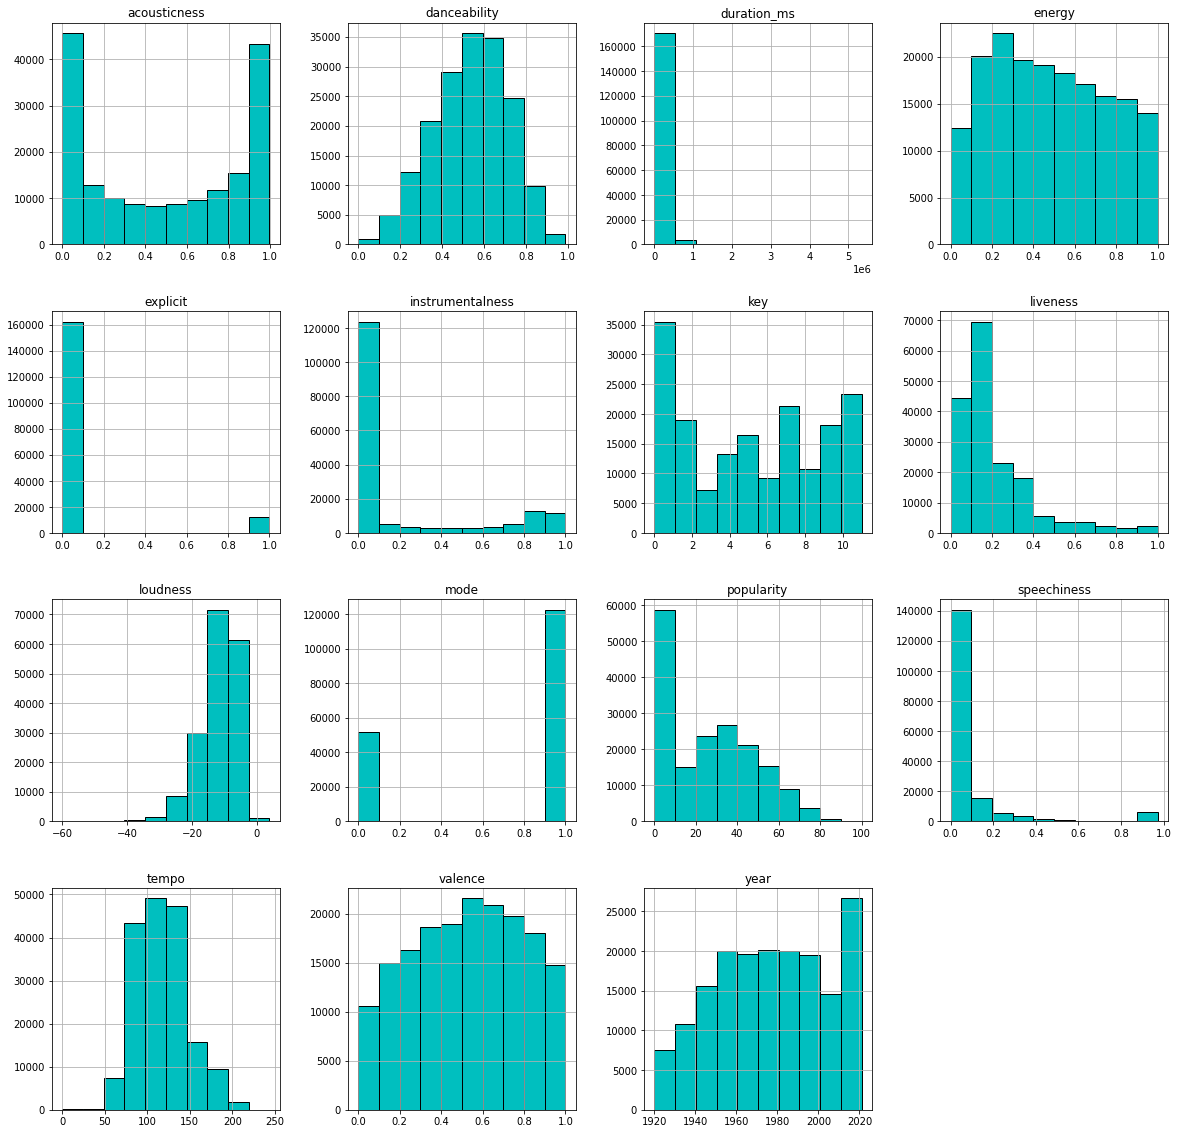

In [ ]:
first_data.hist(figsize=(20, 20),color='c', edgecolor='black')
plt.show()



* Now we can make further analyses and make these analyses visual.
* We saw the distribution of each feature among all songs. Now we will examine changes in these features throughout the years (i.e. from 1920 to 2020)
* We will only look at a few important features that will help us for further examinations.



---



Text(0.5, 0, 'Year')

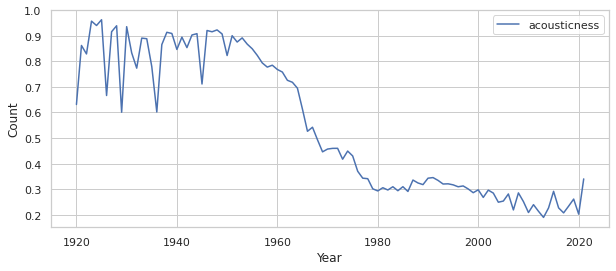

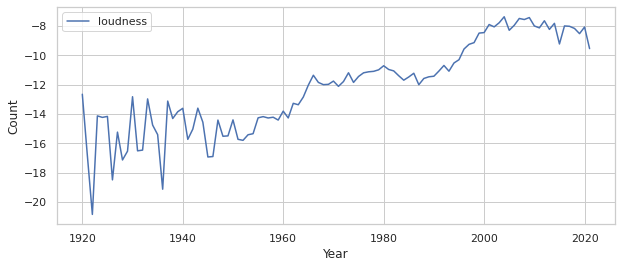

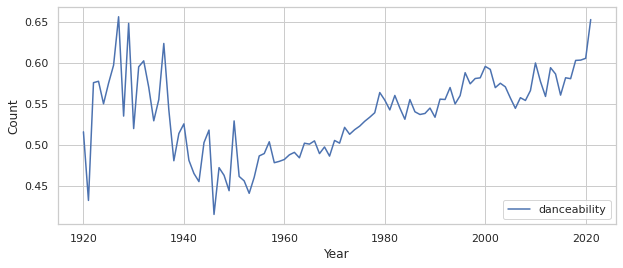

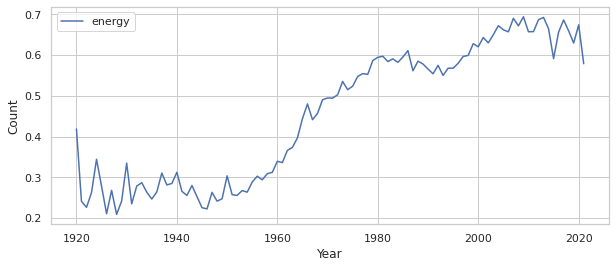

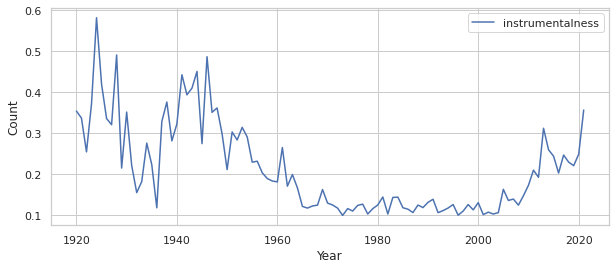

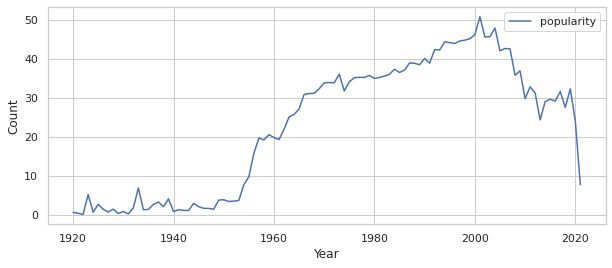

In [ ]:
# acousticness - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["acousticness"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# loudness - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# dancebility - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["danceability"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# energy - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["energy"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# instrumentalness - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["instrumentalness"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# popularity - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')



* As you can see from the visual data, over the years the acousticness of the songs decreased. In contrast, the loudness and energy of the songs remarkably increased from 1920 until today. Similarly, the dancebility of the songs is increased as well.
* The few years after the 2000s, popularity shows its highest value.
* Throughout the years the level of instrumentalness has been fluctuated and had some changes but it almost at the same level as it is in 1920.
* It is too soon to assume the correlations by just looking at this visual graphs but there might be a positive correlation between loudness and energy of the songs. We will see this kind of correlation in further analysis.


### Another way to show changes of the features over the years
  * Another way to show these changes is to use *'barplot'*. In this way, we are able to show each year's data and the values of the corresponding years.
  * Since it is colorful, it might be very attractive for the viewers.
  * It has a disadvantage though. To be able to show the data properly, we should use big sizes and this will cover a lot of space on the page.

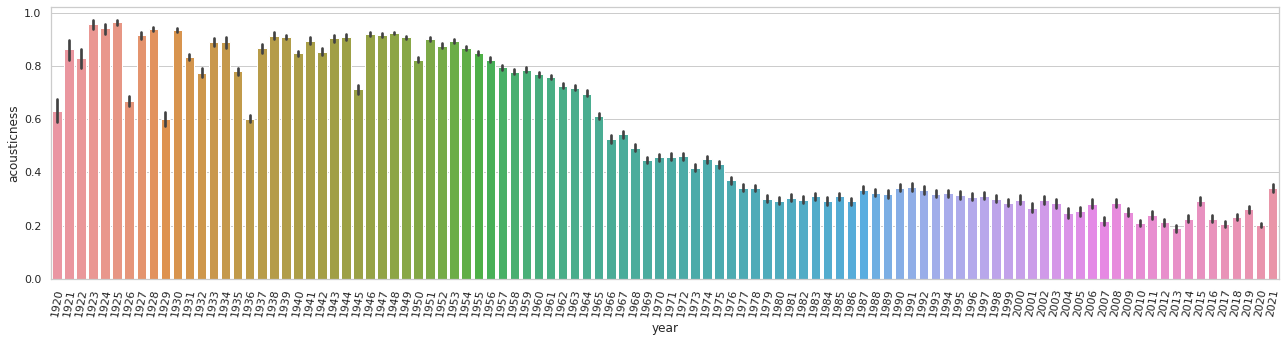

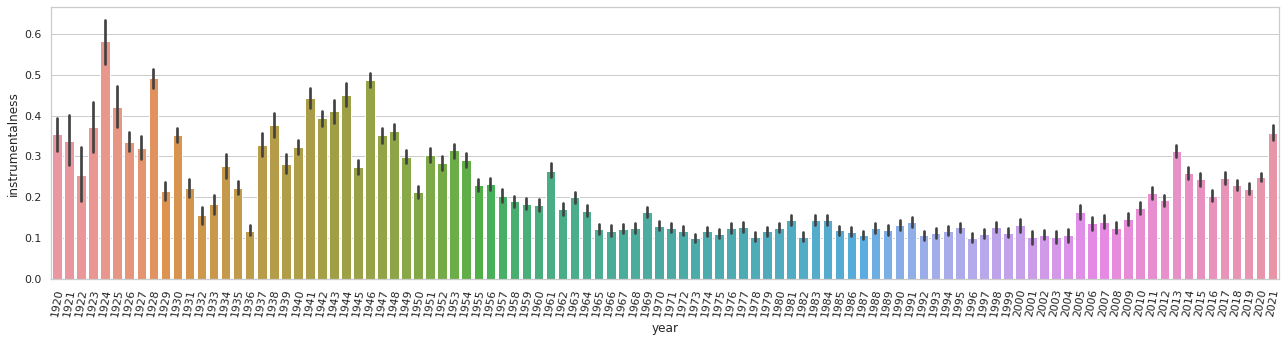

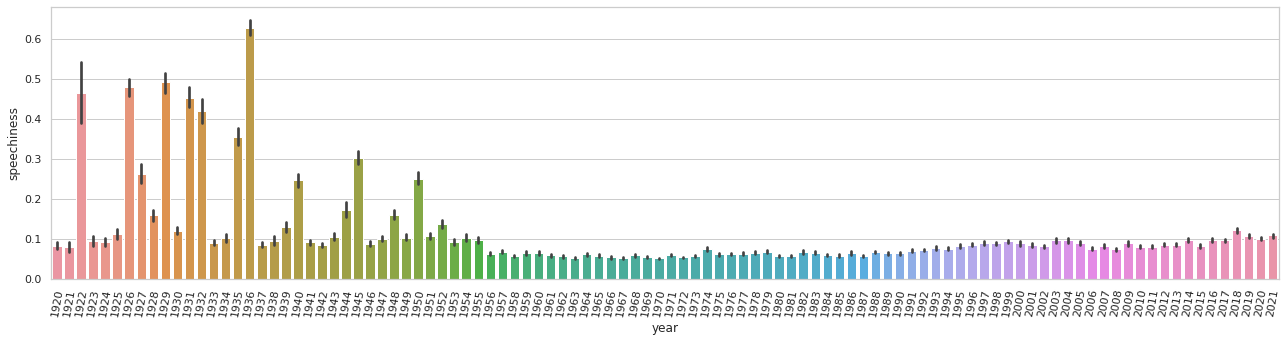

In [ ]:
#acousticness
plt.figure(figsize=(22, 5))
sns.barplot(x=first_data.year,y=first_data[first_data.columns[0]])  
plt.xticks(rotation=80);
plt.show()

#instrumentalness
plt.figure(figsize=(22, 5))
sns.barplot(x=first_data.year,y=first_data[first_data.columns[7]])  
plt.xticks(rotation=80);
plt.show()

#speechiness
plt.figure(figsize=(22, 5))
sns.barplot(x=first_data.year,y=first_data[first_data.columns[15]])  
plt.xticks(rotation=80);
plt.show()


### Dataset for genres
* Another important data that we have is *'data_for_genres'*. This data have columns named as;
        
        ['genres', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode']
* This time we have such features that belongs to each genres. 
* As you can see below, each feature's distribution is represented by using the 'displot' method. It shows us the distribution of the values of each feature among genres.

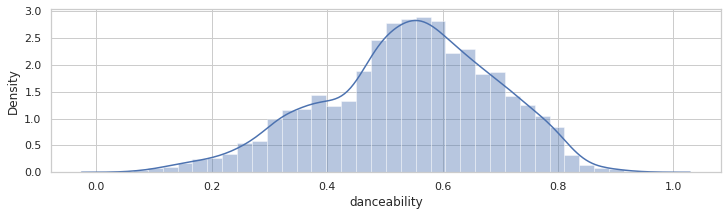

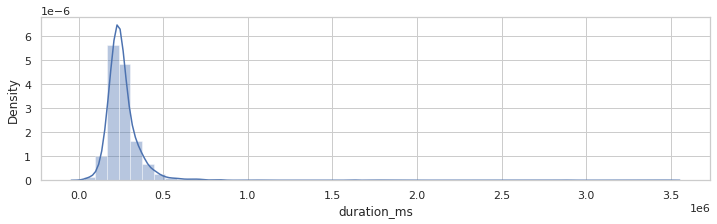

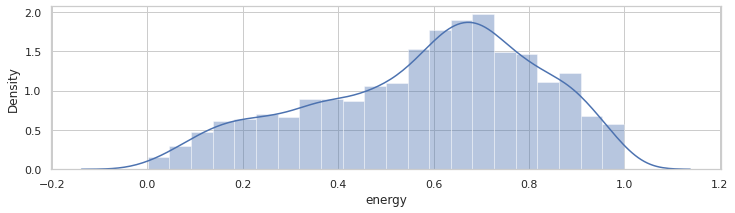

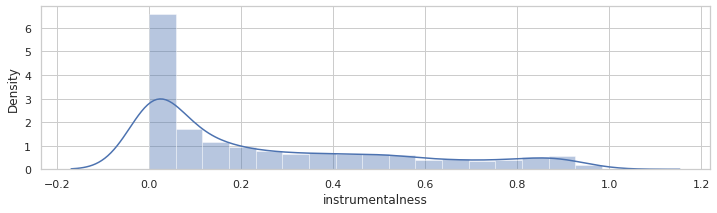

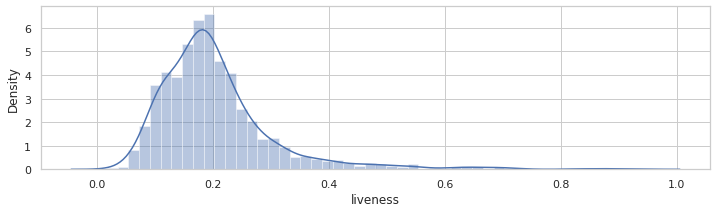

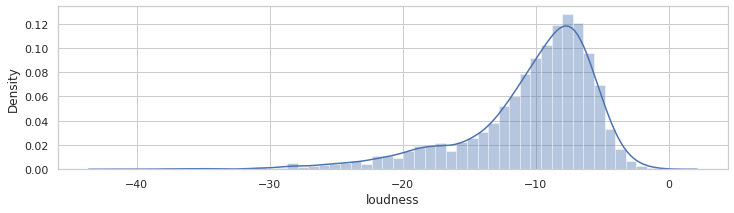

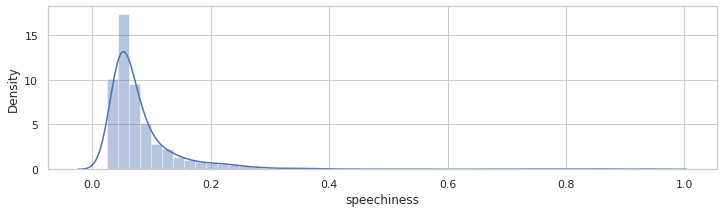

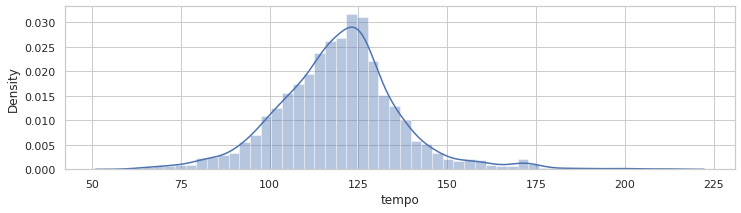

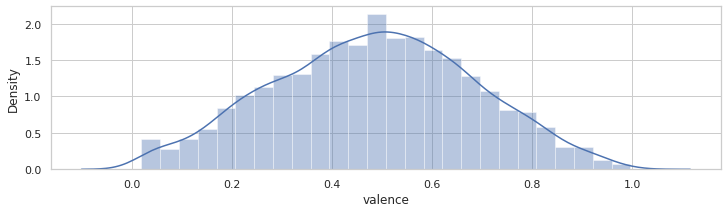

In [ ]:
visual_data = data_for_genres.drop(columns=  ['genres','key', 'mode','popularity'])

for i in range(1,10):
  plt.figure(figsize=(12, 3))
  sns.distplot(visual_data[visual_data.columns[i]])

 

* Using scatterplots might help us to see the relations between the features of genres.

* Below, you will see the code to obtain visualization of features and their comparison.

''

<Figure size 1152x576 with 0 Axes>

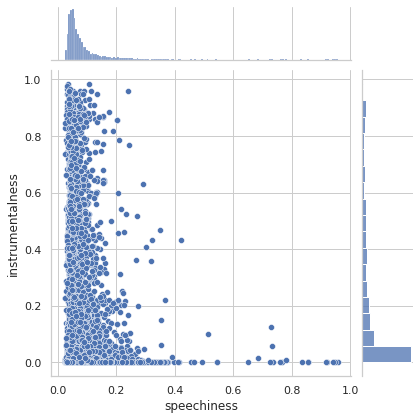

<Figure size 1152x576 with 0 Axes>

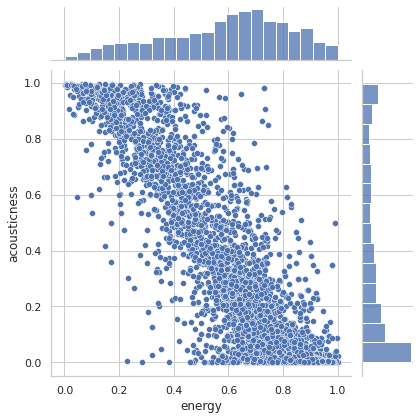

<Figure size 1152x576 with 0 Axes>

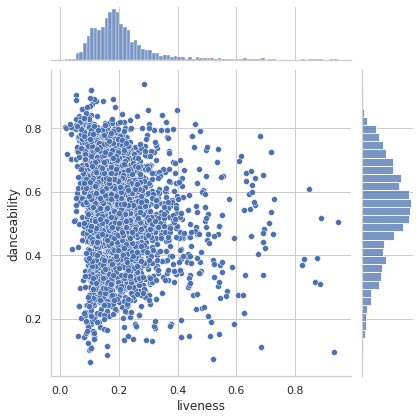

<Figure size 1152x576 with 0 Axes>

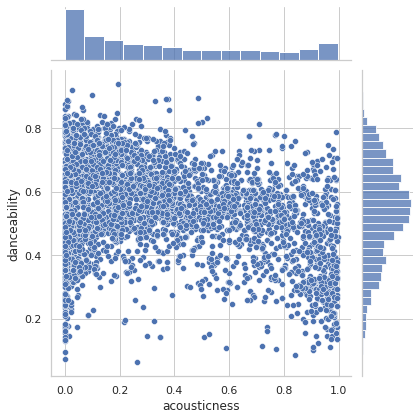

In [ ]:
#combining two data feature with scatterplot

plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data_for_genres['speechiness'],y=data_for_genres["instrumentalness"],data=data_for_genres)
;

plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data_for_genres['energy'],y=data_for_genres["acousticness"],data=data_for_genres)
;

plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data_for_genres['liveness'],y=data_for_genres["danceability"],data=data_for_genres)
;

plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=data_for_genres['acousticness'],y=data_for_genres["danceability"],data=data_for_genres)
;

#Visualizations of Aggregated Forms Based on Features

* So far, we examined how the features of songs and features of the genres changed over the years. Now by using proper methods we can compare these changes.
* Below you will see the comparisons of two different features of songs.

''

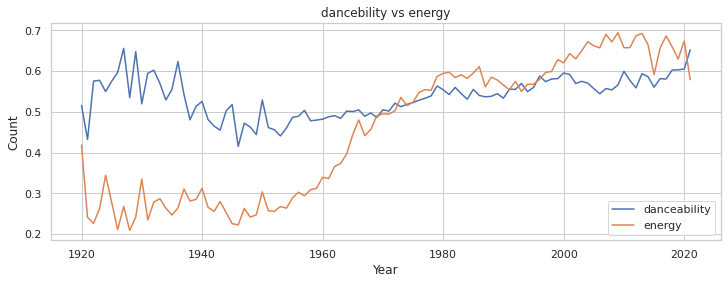

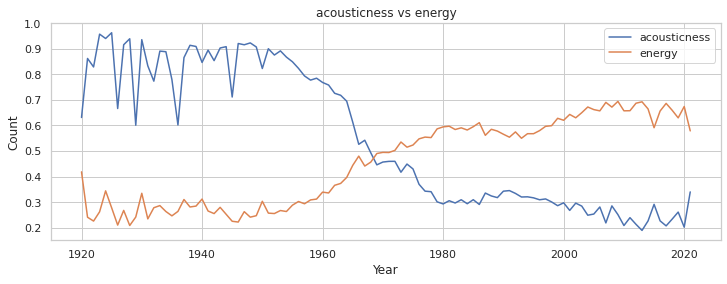

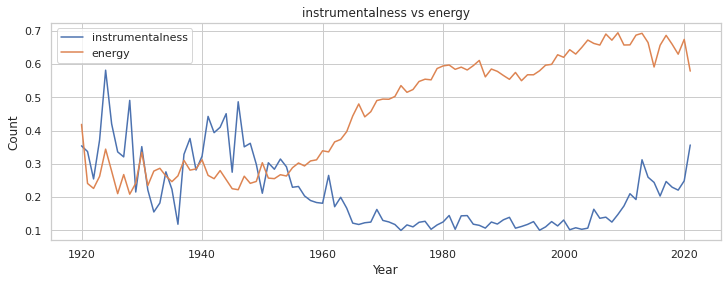

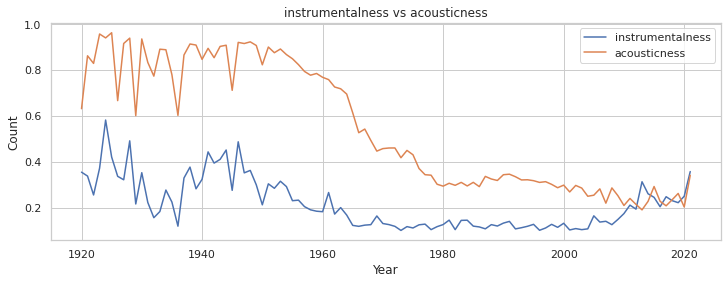

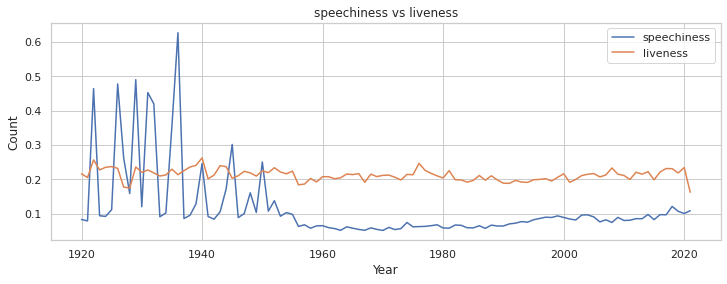

In [ ]:
#change in the danceability and energy over the years

plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
columns = ["danceability","energy"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('dancebility vs energy')
ax.set_ylabel('Count')
ax.set_xlabel('Year')


#change in the acousticness and energy over the years
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
columns = ["acousticness","energy"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('acousticness vs energy')
ax.set_ylabel('Count')
ax.set_xlabel('Year')


#change in the instrumentalness and energy over the years
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
columns = ["instrumentalness","energy"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('instrumentalness vs energy')
ax.set_ylabel('Count')
ax.set_xlabel('Year')


#change in the loudness and energy over the years
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
columns = ["instrumentalness","acousticness"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('instrumentalness vs acousticness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

#change in the speechiness and liveness over the years
plt.figure(figsize=(12, 4))
sns.set(style="whitegrid")
columns = ["speechiness","liveness"]
for col in columns:
    x = first_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('speechiness vs liveness')
ax.set_ylabel('Count')
ax.set_xlabel('Year')
;

### Making some comments on comparisons

  * When we look at the first graph, both features have increased after the year they started. However, energy increased much more than dancebility.


  *  If we look for the second graph, the features have an opposite progression from each other. While the acoustics decreased from the year it started, the energy has been increasing since the year it started.

  * When we look at the third graph, the features that had very close values between the years 1930-1960 diverged from each other after 1960. The energy has increased continuously and has reached a much higher point than when it started. Instrumentalness first decreased, then increased again to a point close to its original value.

  * When we look at fourth graph, acoustics had a fluctuated graphic until 1960. After 1960, the value of acoustics started to decline and comes to the same value with the instrumentalness that we compare with acoustics. Instrumentalness reaches almost the same value it started after its fluctuated graphic until today.

  * When we look at fifth graph, while speechless has a fluctuated graphic between 1920-1960, it has not changed much after 1960 and has a value slightly higher than the value it started with when it came to the present day. Liveness, on the other hand, has a graphic that does not have large fluctuations, unlike speechless. However, when the starting value is compared with the current value, there is a decrease. When the values of both features are compared, liveness has a higher value than speechless.


---



## Comparing Multiple Datas
* As we did in the previous code cells, we will compare multiple features of the songs by using only one box.

* This will help us to understand the differences among features better.

* As you see below, over the years, the song became more energetic and less acoustic. On the other hand, there is not a huge change in the level of valance, liveness, and danceability of the songs over the years.

* The fluctuation in the speechiness became more stable towards 2020.

''

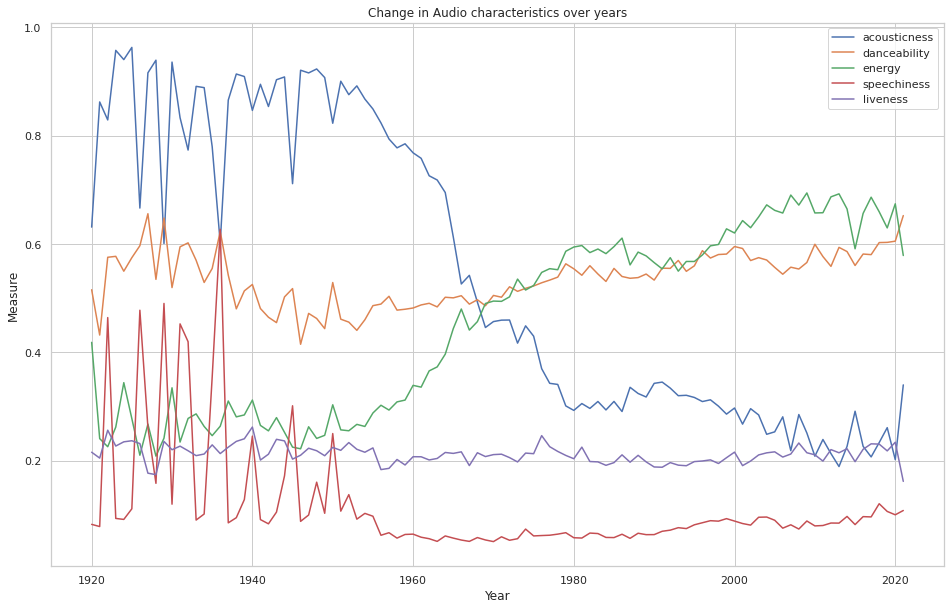

In [ ]:
#audio characteristics over years

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness"]
for col in columns:
    x = data_for_years.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Change in Audio characteristics over years')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
;



---



---



---



## Analysing distribution of attributes for songs dataset

* So far we examined the distribution of song's features over the years and the distributions of genre's features over the years.

* This time we will visualize our data with respect to the artists. We will examine how the features of an artists' songs changed over the years.

* Our data that is shown below has similar columns with other data that we examined before.

        ['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
         'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
         'valence', 'popularity', 'key', 'mode', 'count']

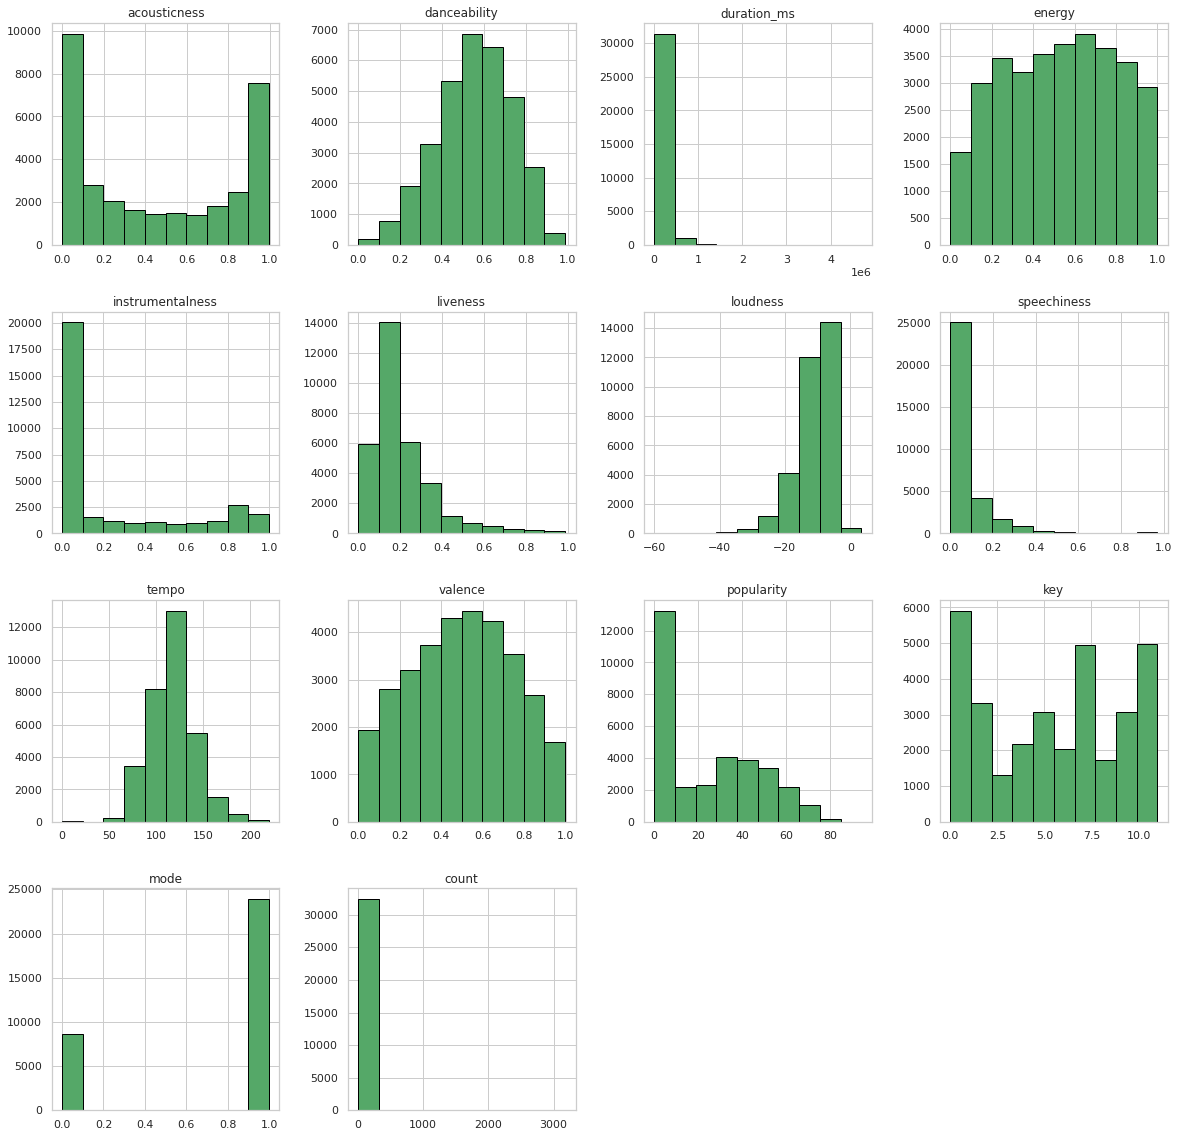

In [ ]:
data_for_artist.hist(figsize=(20, 20),color='g', edgecolor='black')
plt.show()

  * We can also look at the artists who made thousands of songs in their careers.
  * As you can see below, the first 30 artists are listed in order.

''

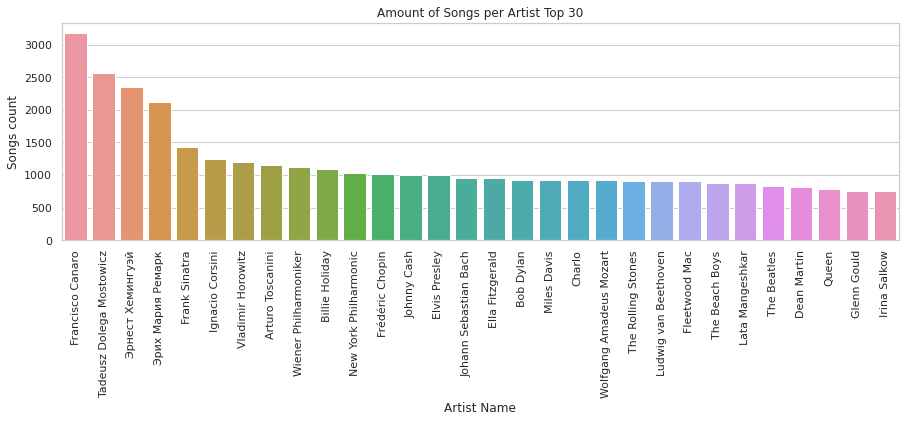

In [ ]:
plt.figure(figsize=(15, 4))
sns.set(style="whitegrid")
x = data_for_artist.groupby("artists")["count"].mean().sort_values(ascending=False).head(30)
ax= sns.barplot(x.index,x)
ax.set_title('Amount of Songs per Artist Top 30')
ax.set_ylabel('Songs count')
ax.set_xlabel('Artist Name')
plt.xticks(rotation = 90)
;

# Analysis of the Most Popular Artists and Songs
* At the end of the visualization step, we will look at the most popular artists and most popular songs.

* We will use the *'popularity'* factor to compare each of them.

  

''

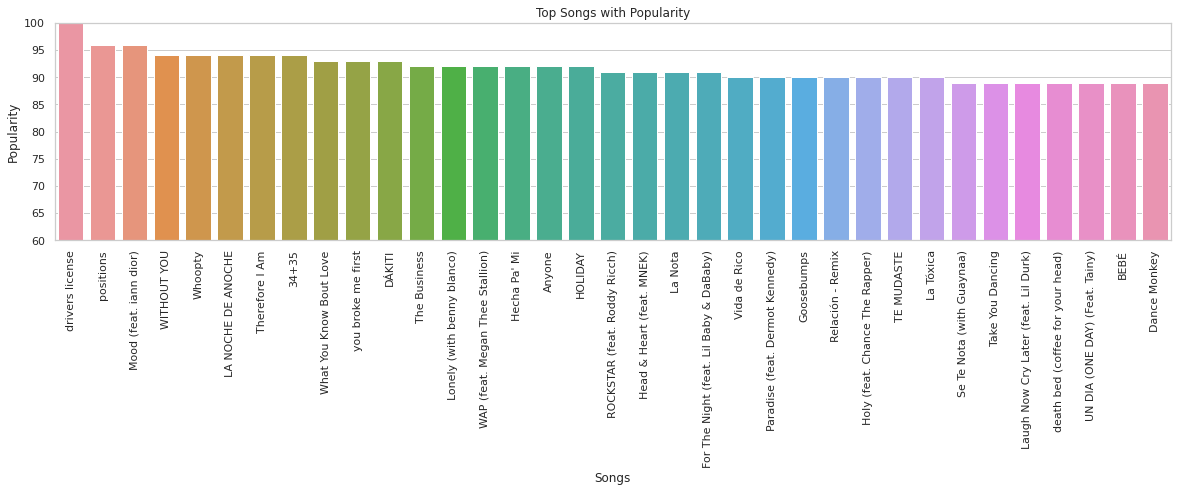

In [ ]:
#finding which is the popular song
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
x = first_data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(35)
axis = sns.barplot(x.index, x)
axis.set_title('Top Songs with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Songs')
plt.ylim(60,100);
plt.xticks(rotation = 90)
;

  * As you can see, the most popular song over the years is **'driver license** according to the above graph.

''

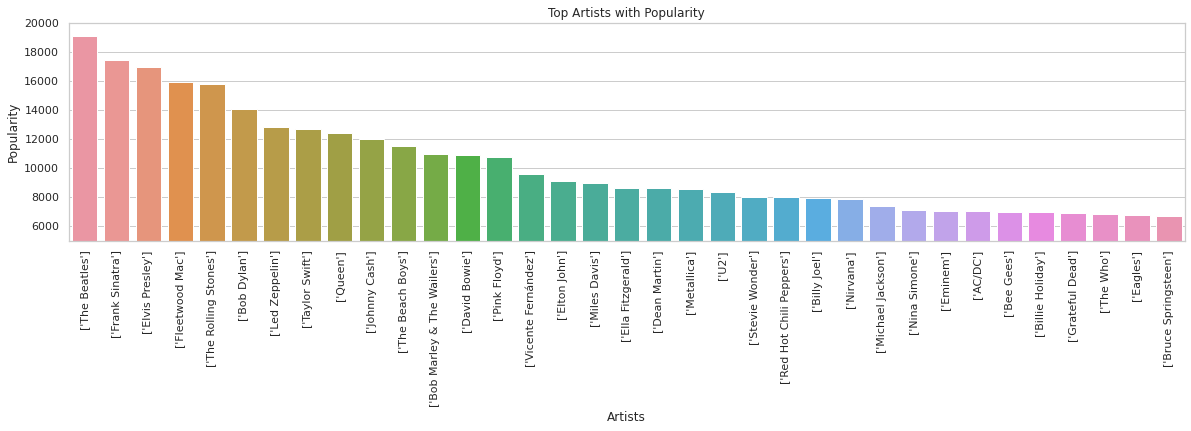

In [ ]:
#finding the popular artists
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
x = first_data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(35)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.ylim(5000,20000);
plt.xticks(rotation = 90)
;

  * On the other hand, by looking above graph, we can see that the most popular artist over the years is **'The Beatles'**.

''

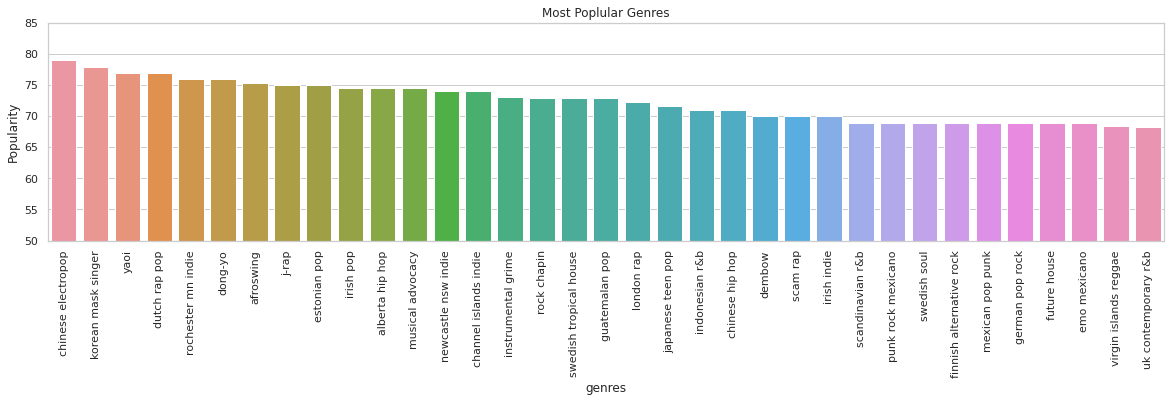

In [ ]:
plt.figure(figsize=(20, 4))
sns.set(style="whitegrid")
x = data_for_genres.groupby("genres")["popularity"].mean().sort_values(ascending=False).head(35)
axis = sns.barplot(x.index, x)
axis.set_title('Most Poplular Genres')
axis.set_ylabel('Popularity')
axis.set_xlabel('genres')
plt.ylim(50,85);
plt.xticks(rotation = 90)
;

# Analyzing how songs of different genres change with time

* We created a new graphics with the information we obtained by merging two data files we have.
* As common columns while merging, we used *'artists'* since it is the only common attribute to compare rows
* At the end we dropped unneeded columns and visualize the data that we found

In [ ]:
#obtaining needed files
data = pd.read_csv(join(path_prefix, first_data_name))
genre = pd.read_csv(join(path_prefix, file_wgenres))

In [ ]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
row_example = data['artists'][174384]
re.findall(r'[\']([\w\s-]+)[\']', row_example)

['DJ Combo', 'Sander-7', 'Tony T']

In [ ]:
data['artists'] = data['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,[Mamie Smith],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,[],0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,[Mamie Smith],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,[Oscar Velazquez],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,[Mixe],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
data = data.explode('artists')
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,Tony T,0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,Roger Fly,0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
merged = pd.merge(data, genre, on="artists")
merged.tail()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
218698,0.966,Johannes Bornlöf,0.269,424200,0.0926,0,1Svqb7CX6rQvJpZY3iVBXh,0.890,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218699,0.995,Johannes Bornlöf,0.297,349200,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218700,0.995,Johannes Bornlöf,0.343,206700,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218701,0.966,Johannes Bornlöf,0.269,424200,0.0926,0,4yBReaKJW78ZYCHpc1cfaK,0.890,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218702,0.988,Johannes Bornlöf,0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879,3,0.1200,-24.121,1,Night,0,2021-01-23,0.0515,81.070,0.0373,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."


In [ ]:
final_merge = merged.drop(columns=(['acousticness_x', 'artists', 'danceability_x', 'duration_ms_x',
       'energy_x', 'explicit', 'id', 'instrumentalness_x', 'key_x',
       'liveness_x', 'loudness_x', 'mode_x', 'name', 'popularity_x',
       'release_date', 'speechiness_x', 'tempo_x', 'valence_x', 'valence_y','key_y', 'mode_y', 'count'] ))

In [ ]:
genre_data1 = merged

In [ ]:
genre_data1['genres'] = genre_data1['genres'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))

In [ ]:
genre_data1 = genre_data1.explode('genres')

In [ ]:
genre_data1.head(5)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,harlem renaissance
0,0.991,Mamie Smith,0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,traditional blues
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,harlem renaissance
1,0.993,Mamie Smith,0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,traditional blues
2,0.992,Mamie Smith,0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,harlem renaissance


In [ ]:
genre_data1 = genre_data1.loc[genre_data1['year'] > 1989]

In [ ]:
genre_data1 = genre_data1.loc[genre_data1['year'] < 2000]

In [ ]:
genre_data1_2 = genre_data1[genre_data1['genres'] == 'pop']

In [ ]:
genre_data1_2.head(4)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
43787,0.6260,Mina,0.195,178493,0.421,0,0EDlJ6ieO5aIJdkkYOPEfb,0.000000,3,0.100,-8.883,1,Il cielo in una stanza,34,1994,0.0282,92.616,0.383,1994,0.684089,0.458855,157841.323699,0.426039,0.012802,0.202450,-11.201162,0.043303,112.651711,0.624673,5.82659,0,1,173,pop
84451,0.4660,The Band,0.648,314840,0.525,0,4JwjzS9WFkWlpzGCwh82fn,0.000002,9,0.165,-9.213,1,Atlantic City,65,1993-11-02,0.0241,98.131,0.724,1993,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.061260,119.732317,0.614023,33.82069,0,1,145,pop
84471,0.0509,The Band,0.481,482160,0.505,0,7xbxxRZuxcrntSh7ytgsT3,0.033900,2,0.814,-13.002,1,Comfortably Numb - Live In Berlin,38,1990-01-01,0.0391,127.068,0.255,1990,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.061260,119.732317,0.614023,33.82069,0,1,145,pop
84486,0.3740,The Band,0.569,191147,0.486,0,3k1CkxuCr5nL64C3INiEqz,0.000000,9,0.232,-12.934,1,Evangeline (with the Band) - 2008 Remaster,37,1990,0.0371,140.367,0.536,1990,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.061260,119.732317,0.614023,33.82069,0,1,145,pop


In [ ]:
genre_data2 = merged

In [ ]:
genre_data2 = genre_data2.explode('genres')
genre_data2.head(4)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
0,0.991,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,harlem renaissance
0,0.991,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,traditional blues
1,0.993,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,harlem renaissance
1,0.993,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920,0.983,0.62725,177981.75,0.184556,0.000288,0.372625,-12.800313,0.121438,113.009938,0.641062,3.1875,0,1,16,traditional blues


In [ ]:
genre_data2 = genre_data2.loc[genre_data2['year'] > 1999]

In [ ]:
genre_data2 = genre_data2.loc[genre_data2['year'] < 2010]

In [ ]:
genre_data2_2 = genre_data2[genre_data2['genres'] == 'pop']

In [ ]:
genre_data2_2.head(4)

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
84472,0.2370,The Band,0.557,275800,0.752,0,3TKOJWYOMrp98OB19y1A0n,0.000002,9,0.124,-8.169,1,The Last Waltz Suite: The Weight (feat. The St...,52,2002-12-16,0.0566,74.108,0.687,2002,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.06126,119.732317,0.614023,33.82069,0,1,145,pop
84498,0.0973,The Band,0.343,372000,0.965,0,4XV9FR6vA82YRvHRYn7jPP,0.058400,7,0.967,-5.318,1,Caravan (feat. Van Morrison) - Concert Version,41,2002-12-16,0.1510,164.885,0.544,2002,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.06126,119.732317,0.614023,33.82069,0,1,145,pop
84499,0.0953,The Band,0.576,281760,0.966,0,2jkcROPESebwRrvoZZdnaN,0.000486,5,0.970,-6.044,1,Such a Night (feat. Dr. John) - Concert Version,41,2002-12-16,0.3340,113.322,0.478,2002,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.06126,119.732317,0.614023,33.82069,0,1,145,pop
84505,0.1260,The Band,0.367,277493,0.864,0,3ECIC2erE6103yYfSxWz80,0.002100,0,0.960,-7.073,1,The Night They Drove Old Dixie Down - Concert ...,41,2002-12-16,0.0894,121.018,0.401,2002,0.390092,0.546255,254074.524138,0.623138,0.049604,0.275777,-9.188076,0.06126,119.732317,0.614023,33.82069,0,1,145,pop


Text(0.5, 0, 'Year')

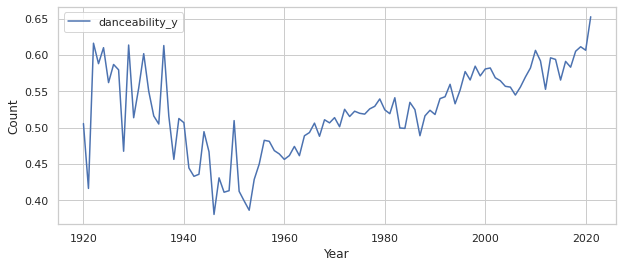

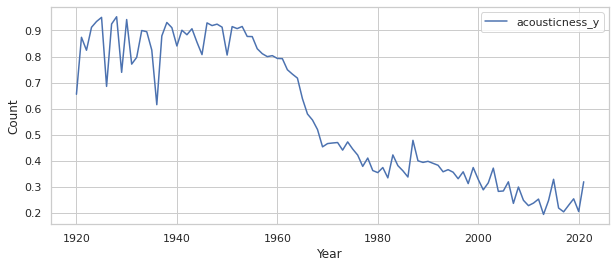

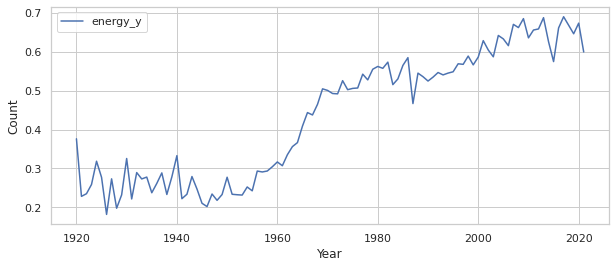

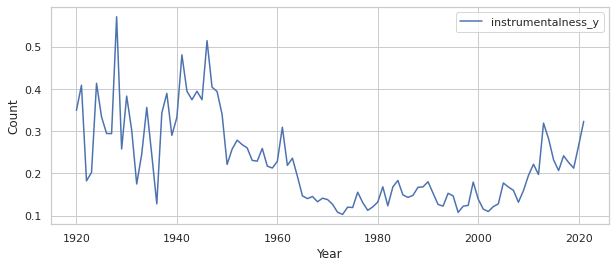

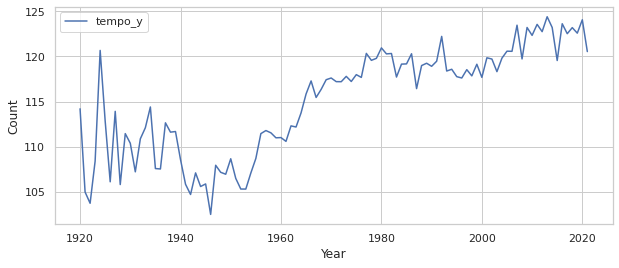

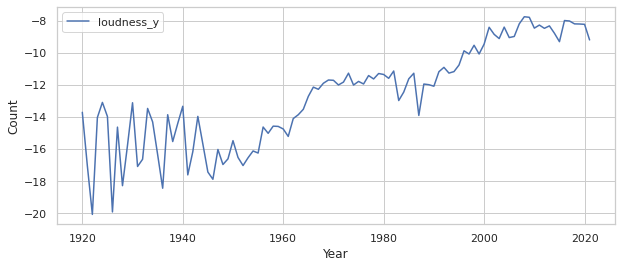

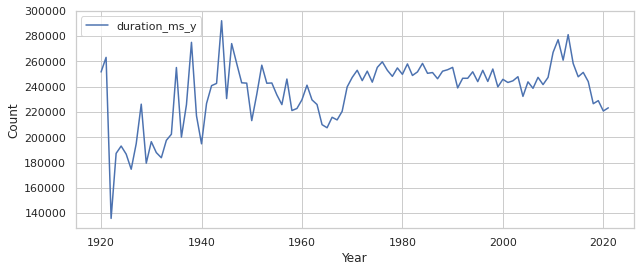

In [ ]:
# dancebility - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["danceability_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')


# acousticness - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["acousticness_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# energy - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["energy_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# instrumentalness - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["instrumentalness_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# tempo - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["tempo_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# loudness - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["loudness_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')

# duration_ms_y - year
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
columns = ["duration_ms_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_ylabel('Count')
ax.set_xlabel('Year')


''

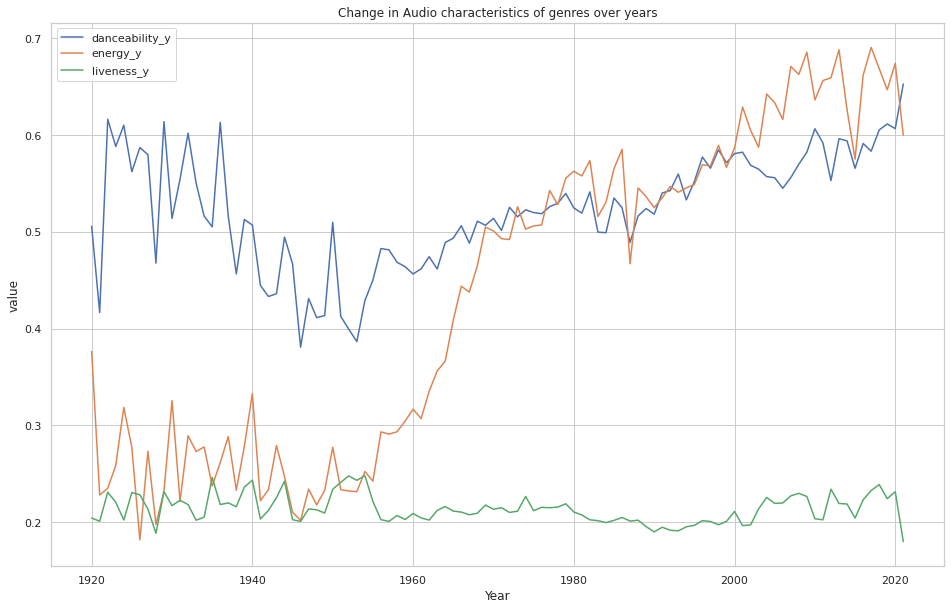

In [ ]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
columns = ["danceability_y","energy_y","liveness_y"]
for col in columns:
    x = final_merge.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Change in Audio characteristics of genres over years')
ax.set_ylabel('value')
ax.set_xlabel('Year')
;

#Statistical Analysis & Hypothesis Testing

* At this step of our project, we will try to use some statistical methods to prove or disprove the null hypothesis.
* First we will examine the relationships between popularity of each song and the feature of them such as danceability, liveness, tempo, acousticness, instrumentalness etc.
* To be able to work efficiently we first sort the songs from ascending to descending order according to their popularity values.
* we will divide the data into two group. One is represent the most 15 popular song aand the others will represent the rest of the songs.

**Null Hypothesis ($H_0$)**: There is not significant differences in terms of popularity for different song features

**Alternative Hypothesis ($H_A$)**: There is significant differences in terms of popularity for different song features


**Significance level**: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [ ]:
data_for_testing = first_data

In [ ]:
data_for_testing.sort_values(by=['popularity'], inplace=True, ascending=False)

In [ ]:
test_dataframe = data_for_testing.head(15)
other_dataframe = data_for_testing.tail(174374)

## Hypothesis 1
 * **Null Hypothesis ($H_0$)** = Danceability has no effect on the popularity of the songs
 * **Alternative Hypothesis ($H_A$)** = Danceability has an effect on the popularity of the song

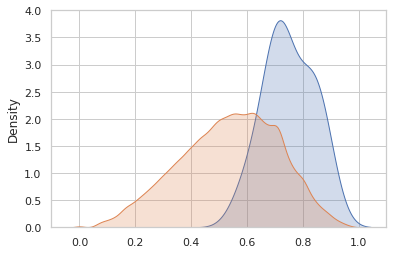

In [ ]:
ax = sns.kdeplot(test_dataframe["danceability"].rename(""),shade=True)
sns.kdeplot(other_dataframe["danceability"].rename(""), ax=ax, shade= True)
plt.show()

* blue area represents the most popular songs danceability values and yellow area represents the other songs danceability values.
* Now we will examine p_value in order to find if our null hypothesis is true or false.
* our significance level will be 0.05

In [ ]:
significance_level = 0.05
test_dataframe_val = test_dataframe["danceability"]
other_dataframe_val = other_dataframe["danceability"]

_, p_value = stats.ttest_ind(a=test_dataframe_val, b=other_dataframe_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < significance_level):
  print("According to p value that we calculated, we reject the null hypothesis which menas danceability has an effect on popularity of the song")
else:
  print("According to p value that we calculated, we fail to reject the null hypothesis")
  print("which means danceability has an effect on popularity of the song") 

P value:  2.13E-07
According to p value that we calculated, we reject the null hypothesis which menas danceability has an effect on popularity of the song


##Hypothesis 2
* **Null Hypothesis ($H_0$)** = tempo has no effect on the popularity of the songs
* **Alternative Hypothesis ($H_A$)** = tempo has an effect on the popularity of the song

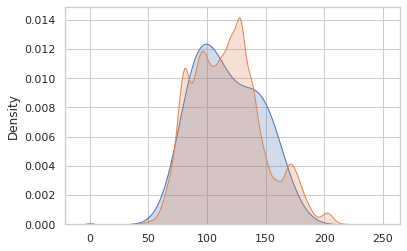

In [ ]:
ax = sns.kdeplot(test_dataframe["tempo"].rename(""),shade=True)
sns.kdeplot(other_dataframe["tempo"].rename(""), ax=ax, shade= True)
plt.show()

In [ ]:
significance_level = 0.05
test_dataframe_val = test_dataframe["tempo"]
other_dataframe_val = other_dataframe["tempo"]

_, p_value = stats.ttest_ind(a=test_dataframe_val, b=other_dataframe_val, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance level: ",significance_level)

if(p_value < significance_level):
  print("According to p value that we calculated, we reject the null hypothesis which menas tempo has an effect on popularity of the song")
else:
  print("According to p value that we calculated, we fail to reject the null hypothesis which means tempo has an effect on popularity of the song")

P value:  9.77E-01
Signifance level:  0.05
According to p value that we calculated, we fail to reject the null hypothesis which means tempo has an effect on popularity of the song


##Hypothesis 3
* **Null Hypothesis ($H_0$)** = instrumentalness has no effect on the popularity of the songs
* **Alternative Hypothesis ($H_A$)** = instrumentalness has an effect on the popularity of the song

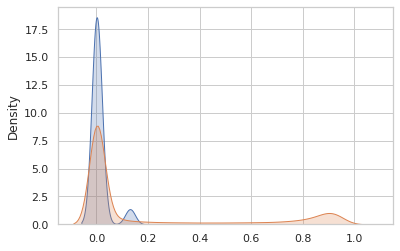

In [ ]:
ax = sns.kdeplot(test_dataframe["instrumentalness"].rename(""), shade=True)
sns.kdeplot(other_dataframe["instrumentalness"].rename(""), ax=ax, shade= True)
plt.show()

In [ ]:
significance_level=0.05
test_dataframe_val = test_dataframe["instrumentalness"]
other_dataframe_val = other_dataframe["instrumentalness"]

_, p_value = stats.ttest_ind(a=test_dataframe_val, b=other_dataframe_val, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance_level)
if (p_value < significance_level):
  print("According to p value that we calculated, we reject the null hypothesis which menas instrumentalness has an effect on popularity of the song")
else:
   print("According to p value that we calculated, we fail to reject the null hypothesis which means instrumentalness has an effect on popularity of the song")

P value:  2.90E-12
Signifance Level: 0.05
According to p value that we calculated, we reject the null hypothesis which menas instrumentalness has an effect on popularity of the song


##Hypothesis 4
* **Null Hypothesis ($H_0$)** = liveness has an effect on the popularity of the songs
* **Alternative Hypothesis ($H_A$)** = liveness has an effect on the popularity of the song 

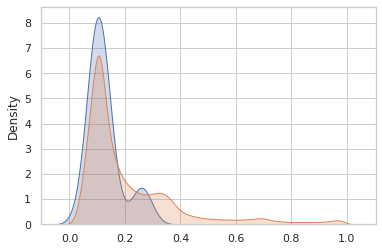

In [ ]:
ax = sns.kdeplot(test_dataframe["liveness"].rename(""), shade=True)
sns.kdeplot(other_dataframe["liveness"].rename(""), ax=ax, shade= True)
plt.show()

In [ ]:
significance_level=0.05
test_dataframe_val = test_dataframe["liveness"]
other_dataframe_val = other_dataframe["liveness"]

_, p_value = stats.ttest_ind(a=test_dataframe_val, b=other_dataframe_val, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance_level)
if (p_value < significance_level):
  print("According to p value that we calculated, we reject the null hypothesis which menas liveness has an effect on popularity of the song")
else:
   print("According to p value that we calculated, we fail to reject the null hypothesis which means liveness has an effect on popularity of the song")

P value:  6.75E-05
Signifance Level: 0.05
According to p value that we calculated, we reject the null hypothesis which menas liveness has an effect on popularity of the song


##Hypothesis 5
* **Null Hypothesis ($H_0$)** = acousticness has no effect on the popularity of the songs
* **Alternative Hypothesis ($H_A$)** = acousticness has an effect on the popularity of the song  

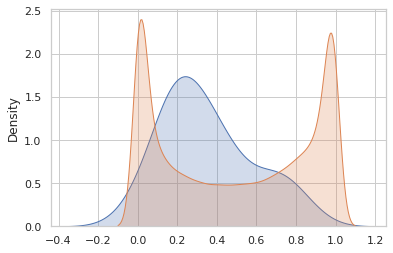

In [ ]:
ax = sns.kdeplot(test_dataframe["acousticness"].rename(""), shade=True)
sns.kdeplot(other_dataframe["acousticness"].rename(""), ax=ax, shade= True)
plt.show()

In [ ]:
significance_level=0.05
test_dataframe_val = test_dataframe["acousticness"]
other_dataframe_val = other_dataframe["acousticness"]

_, p_value = stats.ttest_ind(a=test_dataframe_val, b=other_dataframe_val, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", significance_level)
if (p_value < significance_level):
  print("According to p value that we calculated, we reject the null hypothesis which means acousticness has an effect on popularity of the song")
else:
   print("According to p value that we calculated, we fail to reject the null hypothesis which means acousticness has an effect on popularity of the song")

P value:  2.16E-02
Signifance Level: 0.05
According to p value that we calculated, we reject the null hypothesis which means acousticness has an effect on popularity of the song


###Conclusion for hypothesis 1-2-3-4-5
  * We examined the relationships between the features of the songs and popularity.
  * We saw that almost all of the features has an effect on the popularity of the songs since we reject all null values
  * We conclude this result by comparing the p value of the features with the significance level 0.05

##Hypothesis 6
* **Null Hypothesis ($H_0$)** = 
No change in the danceability of the pop songs between  90s - 2000s
* **Alternative Hypothesis ($H_A$)** = Dancebility of the songs has changed between 90s - 2000s 


In [ ]:
test_genre = genre_data1_2
other_genre = genre_data2_2

In [ ]:
significance_level_g = 0.05
test_datagenre_val = test_genre["danceability_y"]
other_datagenre_val = other_genre["danceability_y"]

_, p_value = stats.ttest_ind(a=test_datagenre_val, b=other_datagenre_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < significance_level_g):
  print("According to p value that we calculated, we reject the null hypothesis which means danceability level of pop songs has changed from 90s to 2000s")
else:
  print("According to p value that we calculated, we fail to reject the null hypothesis")
  print("which means danceability level of pop songs has not changed from 90s to 2000s") 

P value:  7.85E-08
According to p value that we calculated, we reject the null hypothesis which means danceability level of pop songs has changed from 90s to 2000s


##Hypothesis 7
* **Null Hypothesis ($H_0$)** = 
No change in the acousticness of the pop songs between  90s - 2000s
* **Alternative Hypothesis ($H_A$)** = Acousticness of the songs has changed between 90s - 2000s 

In [ ]:
significance_level_g = 0.05
test_datagenre_val = test_genre["acousticness_y"]
other_datagenre_val = other_genre["acousticness_y"]

_, p_value = stats.ttest_ind(a=test_datagenre_val, b=other_datagenre_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < significance_level_g):
  print("According to p value that we calculated, we reject the null hypothesis which means acousticness level of pop songs has changed from 90s to 2000s")
else:
  print("According to p value that we calculated, we fail to reject the null hypothesis")
  print("which means acousticness level of pop songs has not changed from 90s to 2000s") 

P value:  5.50E-17
According to p value that we calculated, we reject the null hypothesis which means acousticness level of pop songs has changed from 90s to 2000s


##Hypothesis 8
* **Null Hypothesis ($H_0$)** = 
No change in the instrumentalness of the pop songs between  90s - 2000s
* **Alternative Hypothesis ($H_A$)** = Instrumentalness of the songs has changed between 90s - 2000s 

In [ ]:
significance_level_g = 0.05
test_datagenre_val = test_genre["instrumentalness_y"]
other_datagenre_val = other_genre["instrumentalness_y"]

_, p_value = stats.ttest_ind(a=test_datagenre_val, b=other_datagenre_val, equal_var=False)
print("P value: ",format(p_value,".2E"))

if(p_value < significance_level_g):
  print("According to p value that we calculated, we reject the null hypothesis which means instrumentalness level of pop songs has changed from 90s to 2000s")
else:
  print("According to p value that we calculated, we fail to reject the null hypothesis")
  print("which means instrumentalness level of pop songs has not changed from 90s to 2000s") 

P value:  5.19E-06
According to p value that we calculated, we reject the null hypothesis which means instrumentalness level of pop songs has changed from 90s to 2000s


###Conclusion for hypothesis 6-7-8

* We examine the changes on fetures of pop music between 90s and 2000s
* In order to compare two eras we used t-test and calculate the p-value of the samples
* According to the p-values we reject or fail to reject the null hypothesis and came to a conclusion
* At the end, we found that there are some changes occured in pop music in terms of features (such as danceability, instrumentalness, and acousticness)  between 90s and 2000s



#Machine Learning 

##Prediction of song popularity with various machine learning models
* For this purpose we will use the following prediction models
  
    * Logistic regression
    * KNN
    * Random forest
    * Decision trees

* To make a classification, we set a popularity level to determine whether a song is popular enough or not.
* To do this, our bound will be 60. Which means if the popularity level of a song is lower that 60, then it will be considered as not popular enough and if its popularity level is above 60, then that song will considered as a popular song


In [ ]:
df = first_data

In [ ]:
df.loc[df['popularity'] < 55, 'popularity'] = 0 
df.loc[df['popularity'] >= 55, 'popularity'] = 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
attributes = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo","valence"]

In [ ]:
training_sample = df.sample(frac = 0.6,random_state = 0)
X_train = training_sample[attributes]
y_train = training_sample['popularity']
X_test = df.drop(training_sample.index)[attributes]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.4, random_state = 0)

### Test for logistic regression to calculate accuracy level

In [ ]:
logisticReg_Model = LogisticRegression()
logisticReg_Model.fit(X_train, y_train)
logisticReg_Predict = logisticReg_Model.predict(X_valid)
logisticReg_Accuracy = accuracy_score(y_valid, logisticReg_Predict)
print("Accuracy: " + str(logisticReg_Accuracy))

Accuracy: 0.8886189869385155


### Test for KNN to calculate accuracy level

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.8761150047785919


### Test for decision Tree to calculate accuracy level

In [ ]:
decisionTree_Model = DecisionTreeClassifier()
decisionTree_Model.fit(X_train, y_train)
decisionTree_Predict = decisionTree_Model.predict(X_valid)
decisionTree_Accuracy = accuracy_score(y_valid, decisionTree_Predict)
print("Accuracy: " + str(decisionTree_Accuracy))

Accuracy: 0.8254221089518955


### Test for random forest to calculate accuracy level

In [ ]:
randomForest_Model = RandomForestClassifier()
randomForest_Model.fit(X_train, y_train)
randomForest_Predict = randomForest_Model.predict(X_valid)
randomForest_Accuracy = accuracy_score(y_valid, randomForest_Predict)
print("Accuracy: " + str(randomForest_Accuracy))

Accuracy: 0.8937161516406499


* Let's compare the accuracy levels of each test

In [ ]:
model_performance_accuracy = pd.DataFrame({'Prediction Model': ['Logistic Regression','Random Forest Classifier', 'KNN Classifier','Decision Tree Classifier'],
                                            'Accuracy': [logisticReg_Accuracy,randomForest_Accuracy,KNN_Accuracy,decisionTree_Accuracy]})

model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Prediction Model,Accuracy
1,Random Forest Classifier,0.893716
0,Logistic Regression,0.888619
2,KNN Classifier,0.876115
3,Decision Tree Classifier,0.825422


#### Conclusion

* As you can see from the table Random Forest Classifier gives us the best accuracy level to predict the popularity of the song
* But other test also give us a good level of accuracy level as well
* Our best accuracy level is 0.893716

## Efforts on hyper-parameter tuning to increase the performance of models

* We will use decision tree model as an example
* As we did in the recitation, we will play with the max_depth of our tree to increase the performance of our model

In [ ]:
decisionTree_Model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
max_depth_values = np.arange(1, 15)

acc_training_scores = []
acc_val_scores = []

for max_depth in max_depth_values:
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X_train,y_train)

  y_pred_training = model.predict(X_train)
  y_pred_val = model.predict(X_valid)

  acc_training = accuracy_score(y_train, y_pred_training)
  acc_val = accuracy_score(y_valid, y_pred_val)

  acc_training_scores.append(acc_training)
  acc_val_scores.append(acc_val)

* Now, our max_depth value is changed from none to a number
* From now on we can set its value

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [ ]:
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
accuracies

array([0.88505442, 0.88505442, 0.88490641, 0.88477366, 0.88517191])

In [ ]:
"Accuracy: {:.2f} (+/- {:.2f})".format(accuracies.mean(), accuracies.std() * 2)

'Accuracy: 0.88 (+/- 0.00)'

* With hyper-parameter tuning, we incresed the performance of our model and we got a better accuracy value which is 0.88

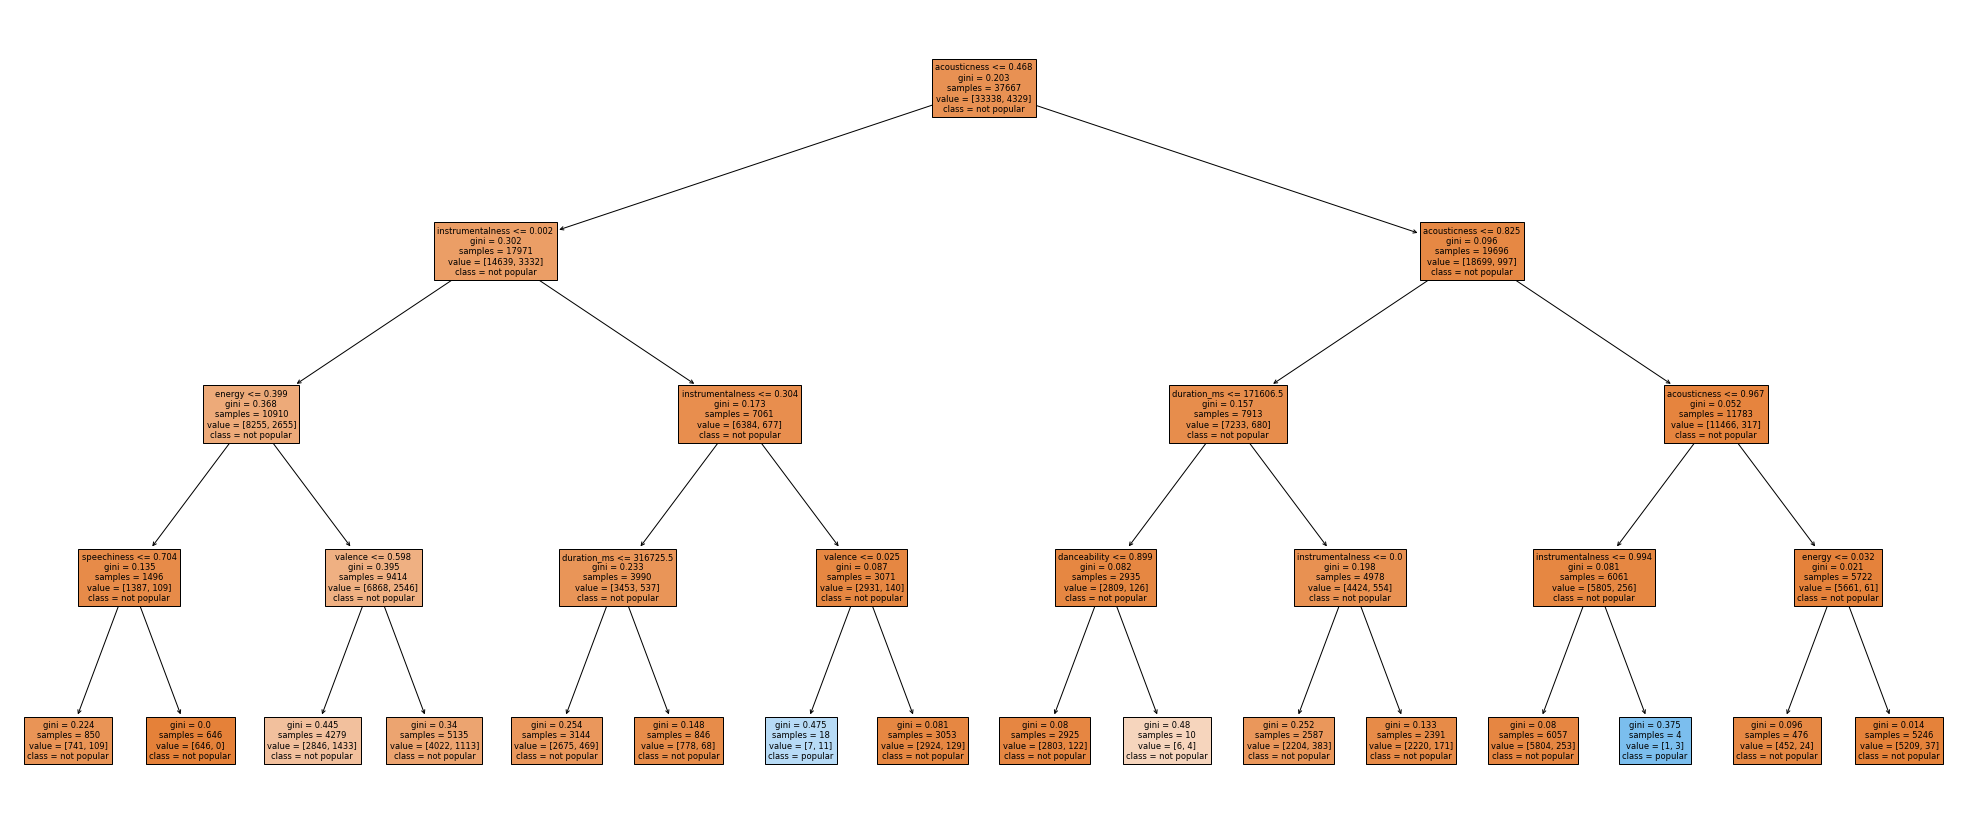

In [ ]:
# tree plot function
from sklearn.tree import plot_tree

# generate the tree
fig = plt.figure(figsize=(35, 15))
plot_tree(model, feature_names=X_test.columns.values, class_names=["not popular", "popular"], filled=True);

## Creating a simple song recommendation system

* In this part of the project, we will implement a basic song recommendation program
* To acieve this, we will use manhattan distance to find the KNN of the given song
* After that, we will sort them according to their distance value to our source song

In [ ]:
from tqdm import tqdm
recommended_data = first_data

In [ ]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [1, 6, 12, 14, 18]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [ ]:
recommend_machine = SpotifyRecommender(recommended_data)

* Here are a couple of example runnings

In [ ]:
recommend_machine.get_recommendations('champagne problems', 5)

100%|██████████| 174385/174385 [00:12<00:00, 13959.39it/s]


,artists,name
92895,['Mega Ran'],Year in Gaming 2015
85127,['Thin Lizzy'],Jailbreak
115222,['Jack Jones'],I Wish You Love
153819,"['Mad CJ Mac', 'Poppa LQ']",Come and Take a Ride
148049,['Wes Montgomery'],Sunny


In [ ]:
recommend_machine.get_recommendations('Girls Like You (feat. Cardi B)', 5)

100%|██████████| 174387/174387 [00:11<00:00, 15690.04it/s]


,artists,name
172903,"['Wisin', 'Jennifer Lopez', 'Ricky Martin']",Adrenalina (feat. Jennifer Lopez & Ricky Martin)
150576,['Frank Zappa'],The Sheik Yerbouti Tango
68721,['Daryl Hall & John Oates'],Looking For A Good Sign
107581,['Beyond Unreal'],X-Rated - Original Edit
123588,['Beyond Unreal'],X-Rated - Original Edit


In [ ]:
recommend_machine.get_recommendations('drivers license', 5)

100%|██████████| 174388/174388 [00:12<00:00, 14455.96it/s]


,artists,name
110028,['Coyote Theory'],This Side of Paradise
120680,['Gregory Isaacs'],Front Door - 1990 Digital Remaster
54215,['Mr. Pookie'],Crook for Life
107945,['Stereo Avenue'],Viva La Vida
92914,['Tame Impala'],'Cause I'm A Man
